# Support vector machine 실습

# 1. 데이터 불러오기, 및 SVM 적합

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- 함수 불러오기

In [2]:
from sklearn import svm,datasets

- 모델 적합

In [36]:
iris= datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

C =1 
clf = svm.SVC(kernel='linear',C=C)
clf.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X)
confusion_matrix(y,y_pred)  

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

# 2. kernel SVM 적합 및 비교

- LinearSVC

In [38]:
clf2 = svm.LinearSVC(C=C,max_iter=10000)
clf2.fit(X,y)
y_pred2 =clf2.predict(X)
confusion_matrix(y,y_pred2)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]], dtype=int64)

- radial basis function

In [39]:
clf2 = svm.SVC(kernel='rbf' ,gamma=0.7,C=C,max_iter=10000)
clf2.fit(X,y)
y_pred2 =clf2.predict(X)
confusion_matrix(y,y_pred2)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]], dtype=int64)

- polynomial kernel

In [40]:
clf3 = svm.SVC(kernel='poly',gamma=0.7,C=C,max_iter=10000)
clf3.fit(X,y)
y_pred2 =clf2.predict(X)
confusion_matrix(y,y_pred2)

C:\Users\com11\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]], dtype=int64)

- 시각적 비교

- 함수 정의

In [41]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

- 데이터 불러오기

In [42]:
iris.data.shape

(150, 4)

In [43]:
iris.target.shape

(150,)

- 모델정의 및 피팅

In [44]:
C = 1.0 #Regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [45]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

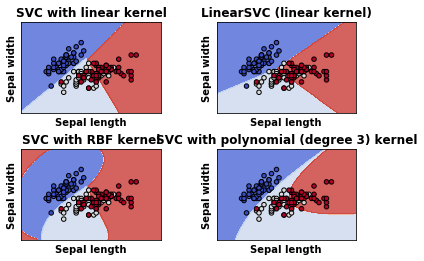

In [46]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

- LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
- LinearSVC uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,